# What is the Best Neighborhood to be a Plant?
https://data.wprdc.org/dataset/allegheny-county-land-cover-areas1
# Introduction
The specific metric I used is amount of land covered by Forest, Grassland, or Agriculture. I decided to use this metric because it is pretty self explanatory that where there are many plants currently, it would be good to be a plant. For one, there is strength in numbers. Secondly, a plant would have more friends where there are other plants. Lastly, areas that are mostly plant life are less likely to be disturbed. To analyze this metric, I used a dataset of land cover in Allegheny County. From here, I filtered out non-plant land cover using query masks. Next, I plotted this data on the same map as various Pittsburgh neighborhoods (also provided by WPDRC). Any colored areas are considered areas with "plant life," thus the greener the neighborhood, the better it is to be a plant.

In [52]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

neighborhoods = geopandas.read_file("Neighborhoods_.shp")
landCover = geopandas.read_file("Land_Cover.shp") # read in the shapefiles

# import dataset
lcaSet = pd.read_csv("Allegheny_County_Land_Cover_Areas.csv")

# Get only areas that are 3, 4, 5
query_mask1 = lcaSet['GRID_CODE'] < 6
query_mask2 = lcaSet['GRID_CODE'] > 2
newlca = lcaSet[query_mask1 & query_mask2]
newlca=newlca.loc[:,['FID',"GRID_CODE"]]
newlca.head(5)

,FID,GRID_CODE
1,2,3
2,3,5
4,5,5
5,6,3
6,7,3


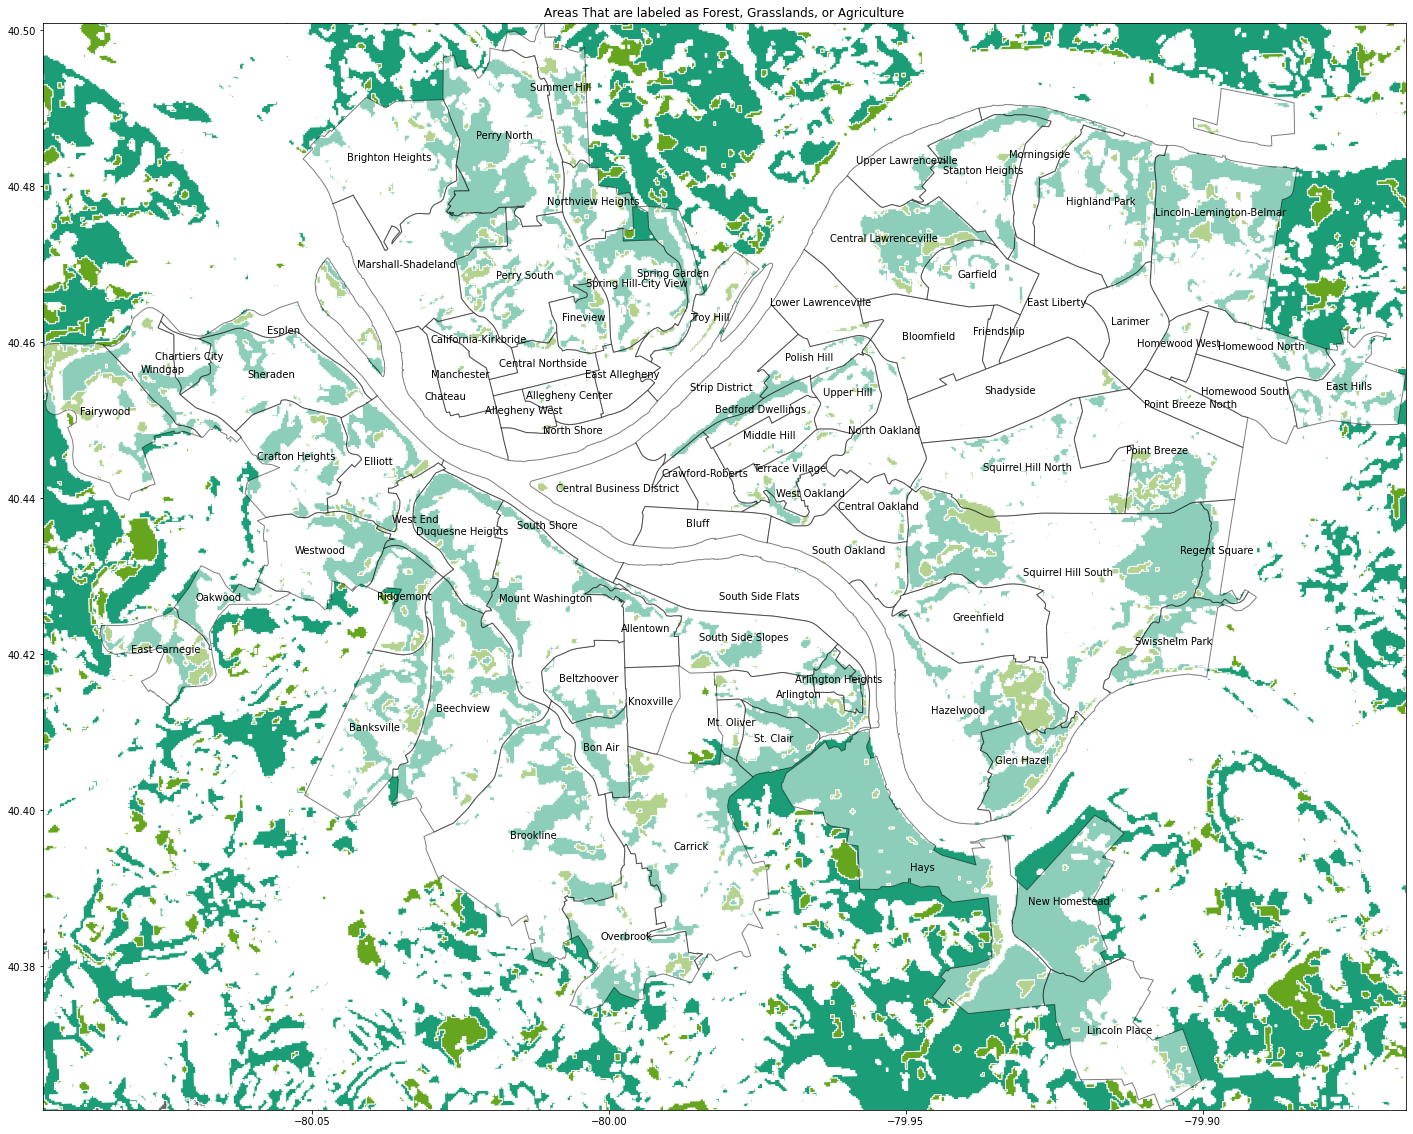

In [53]:
map = landCover.merge(newlca)
neighborhoodMap = neighborhoods
fig, ax = plt.subplots(figsize = (30,20))

crs = ("+proj=longlat +datum=WGS84 +no_defs") 
map = map.to_crs(crs=crs) 

for data in neighborhoodMap.groupby('hood'):
    color = 'white'

map.plot(column = 'GRID_CODE', cmap = 'Dark2', edgecolor = 'white', ax = ax)
nmap = neighborhoodMap.plot(color = color, ax = ax, alpha = 0.5, edgecolor = 'black')
neighborhoodMap.apply(lambda x: nmap.annotate(s=x.hood, xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

ax.set_ylim([40.36161042, 40.50096594])
ax.set_xlim([-80.09533686, -79.86577284])

ax.set(title = "Areas That are labeled as Forest, Grasslands, or Agriculture")
plt.show()

# Best Neighborhoods & Conclusion
As mentioned before, the best neighborhoods are the most green. Using this method, the top 5 are:
* Hays
* New Homestead
* Glen Hazel
* St. Clair
* Ridgemont

The worst 5 are:
* South Side Flats
* Bluff
* Chateau
* Friendship
* Homewood South

Thus, we have the best and worst neighborhoods. There isn't much to say here, as the data is purely based on facts, so these areas would be the best place to be a plant. Coming in, I assumed that some of the worst would be closer to the city, and this suspicion was confirmed. As we get further away from downtown, there is more "plant area," thus better places to be a plant.